In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"Iris.csv")
# data.head()
data.drop("Id", axis=1, inplace=True)
data.drop_duplicates(inplace=True)
# 之所以映射为1与-1,而不是之前的0,1,2，是因为感知器的预测结果为1与-1。
# 目的是为了与感知器预测的结果相符。
data["Species"] = data["Species"].map({"Iris-versicolor": 0, "Iris-virginica": 1, "Iris-setosa": -1})
# data["Species"].value_counts()
data = data[data["Species"] != 0]
len(data)

97

In [3]:
class Perceptron:
    """使用Python语言实现感知器算法，实现二分类。"""
    
    def __init__(self, alpha, times):
        """初始化方法。
        
        Parameters
        -----
        alpha : float
            学习率。
            
        times : int
            最大迭代次数
        
        """
        self.alpha = alpha
        self.times = times
        
    def step(self, z):
        """阶跃函数。
        
        
        Parameters
        -----
        z : 数组类型（或者是标量类型）
            阶跃函数的参数。可以根据z的值，返回1或-1（这样就可以实现二分类）。
            
        Returns
        -----
        value : int
            如果z >= 0,返回1， 否则返回-1。
        """
        
#         return 1 if z >=0 else 0
        return np.where(z >= 0, 1, -1)

    def fit(self, X, y):
        """根据提供的训练数据，对模型进行训练。
        
        Parameters
        -----
        X : 类数组类型。形状：[样本数量，特征数量]
            待训练的样本数据。
            
        y : 类数组类型。 形状： [样本数量]
            每个样本的目标值。（分类）
        
        
        """
        X = np.asarray(X)
        y = np.asarray(y)
        # 创建权重的向量，初始值为0.长度比特征多1.（多出的一个就是截距）。
        self.w_ = np.zeros(1 + X.shape[1])
        #创建损失列表，用来保存每次迭代后的损失值。
        self.loss_ = []
        # 循环指定的次数。
        for i in range(self.times):
            #  感知器与逻辑回归的区别：逻辑回归中，使用所有样本计算梯度，然后更新权重。
            # 而感知器中，是使用单个样本，依次进行计算梯度，更新权重。
            loss = 0
            for x, target in zip(X, y):
                # 计算预测值
                y_hat = self.step(np.dot(x, self.w_[1:]) + self.w_[0])
                loss += y_hat != target
                # 更新权重。
                # 更新公式： w(j) = w(j) +  学习率 * （真实值 - 预测值） * x(j)
                self.w_[0] += self.alpha * (target - y_hat)
                self.w_[1:] += self.alpha * (target - y_hat) * x
            # 将循环中累计的误差值增加到误差列表当中。
            self.loss_.append(loss)
            
    def predict(self, X):
        """根据参数传递的样本，对样本数据进行预测。（1或-1）
        
        Parameters
        -----
        X : 类数组类型， 形状为：[样本数量， 特征数量]
            待预测的样本特征。
            
        Returns
        -----
        result : 数组类型
            预测的结果值（分类值1或-1）
        
        """
        
        return self.step(np.dot(X, self.w_[1:]) + self.w_[0])

In [5]:
t1 = data[data["Species"] == 1]
t2 = data[data["Species"] == -1]
t1 = t1.sample(len(t1), random_state=0)
t2 = t2.sample(len(t2), random_state=0)
train_X = pd.concat([t1.iloc[:40, :-1], t2.iloc[:40, :-1]], axis=0)
train_y = pd.concat([t1.iloc[:40, -1], t2.iloc[:40, -1]], axis=0)
test_X = pd.concat([t1.iloc[40:, :-1], t2.iloc[40:, :-1]], axis=0)
test_y = pd.concat([t1.iloc[40:, -1], t2.iloc[40:, -1]], axis=0)
p = Perceptron(0.1, 10)
p.fit(train_X, train_y)
result = p.predict(test_X)
display(result)
display(test_y.values)
display(p.w_)
display(p.loss_)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1])

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

array([-0.4 , -0.44, -1.44,  1.88,  0.72])

[1, 2, 3, 2, 0, 0, 0, 0, 0, 0]

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

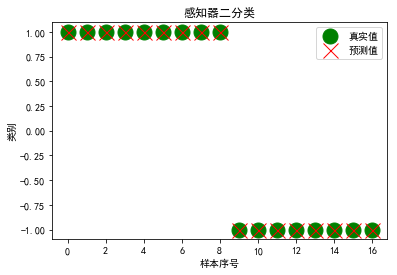

In [8]:
# 绘制真实值
plt.plot(test_y.values, "go", ms=15, label="真实值")
# 绘制预测值
plt.plot(result, "rx", ms=15, label="预测值")
plt.title("感知器二分类")
plt.xlabel("样本序号")
plt.ylabel("类别")
plt.legend()
plt.show()

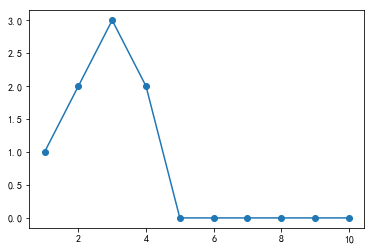

In [10]:
# 绘制目标函数的损失值。
plt.plot(range(1, p.times + 1), p.loss_, "o-")